In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

2.Remove dodgy images

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data' 

In [11]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy.zip', 'sad.zip']

In [12]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'happy', 'sad']

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
170404-happy-workers-feature.jpg
1920px-face-smile-svg_.png
1x1.png
25115.jpg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
4239f3d51d092f69d529f372a37b4601.jpg
7-principles-of-successful-and-happy-people.png
988689_Wallpaper2.jpg
aecd7b04-bb40-42ad-9985-d63a3198a878.jpg
AF2bZygQhWWkcsfr7XGGNtp0sJS1vZ1wmDGmyPY_M9haXdfTrw-s32-c-mo.png
AF2bZygQhWWkcsfr7XGGNtp0sJS1vZ1wmDGmyPY_M9haXdfTrw-s64-c-mo.png
al-icon.png
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
business-people-succesful-celebrating-group-successful-39416.jpg
businesspeople-jumping-celebrating-victory-cheerful-multirac.jpg
businesswoman-giving-high-five-male-260nw-2226244055.jpg
celebrating-popc

In [21]:
img = cv2.imread(os.path.join('data','happy','25115.jpg'))

In [22]:
img.shape

(418, 800, 3)

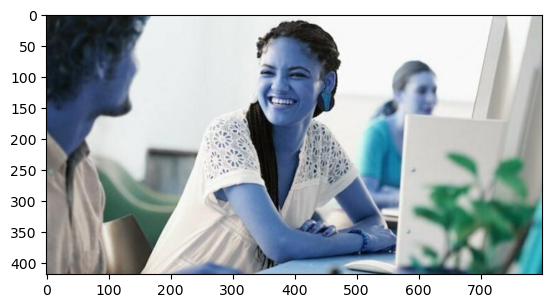

In [23]:
plt.imshow(img)

In [24]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

3.Load Data

In [25]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 184 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001F1ADC51810>)

In [30]:
batch = data_iterator.next()

In [31]:
batch

(array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ],
          [255.       , 254.       , 255.       ]],
 
         ...,
 
         [[2

In [32]:
len(batch)

2

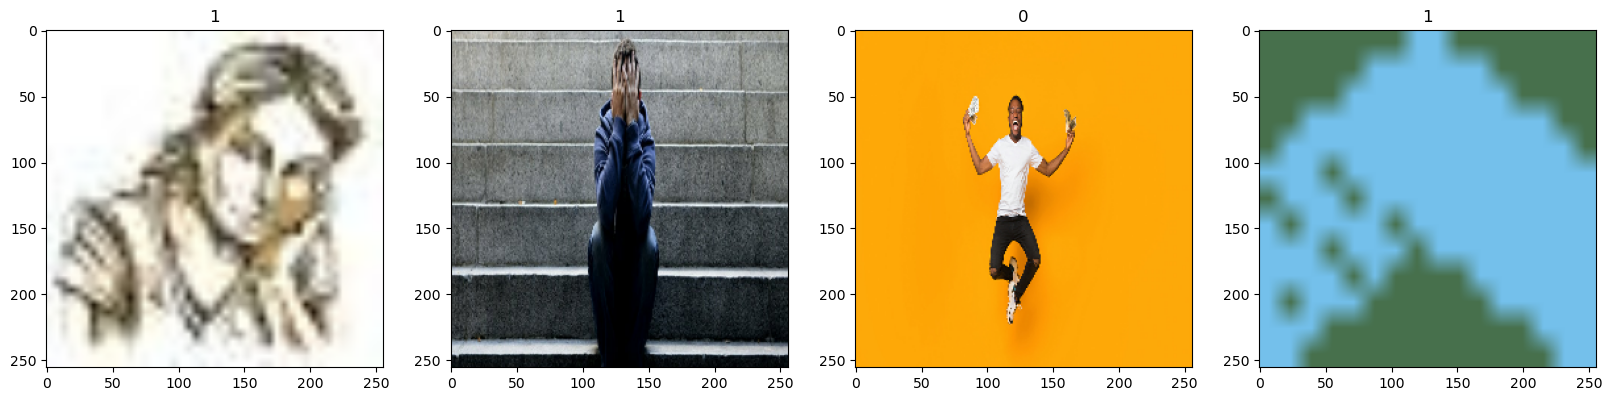

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [34]:
4.Scale Data

SyntaxError: invalid decimal literal (2093275954.py, line 1)

4.Scale Data

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [36]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

5.Split Data

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [38]:
train_size

4

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6.Building Deep Learning Model

In [40]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

7.Train

In [46]:
logdir='logs'

In [47]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5229 - loss: 0.9014 - val_accuracy: 0.6562 - val_loss: 0.7519
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5302 - loss: 0.8847 - val_accuracy: 0.6562 - val_loss: 0.5893
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6396 - loss: 0.6143 - val_accuracy: 0.6875 - val_loss: 0.6237
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 957ms/step - accuracy: 0.7312 - loss: 0.5997 - val_accuracy: 0.5312 - val_loss: 0.6194
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6000 - loss: 0.5578 - val_accuracy: 0.7500 - val_loss: 0.5159
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7344 - loss: 0.5339 - val_accuracy: 0.6875 - val_loss: 0.5862
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step - accuracy: 0.8385 - loss: 0.4183 - val_accuracy: 0.8125 - val_loss: 0.4131
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7740 - loss: 0.4311 - val_accuracy: 0.7188 - val_loss: 0.4237
Epoch 9/2

8.Plot Performance

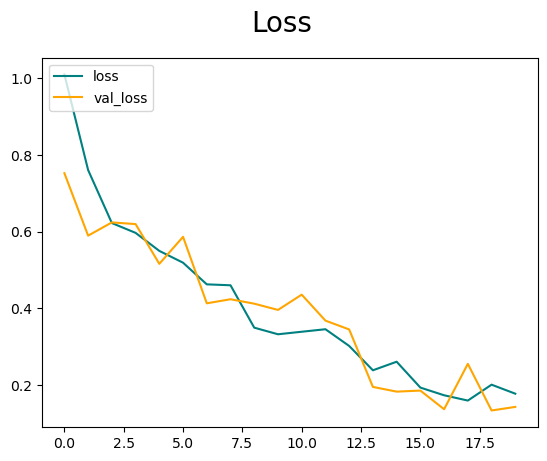

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

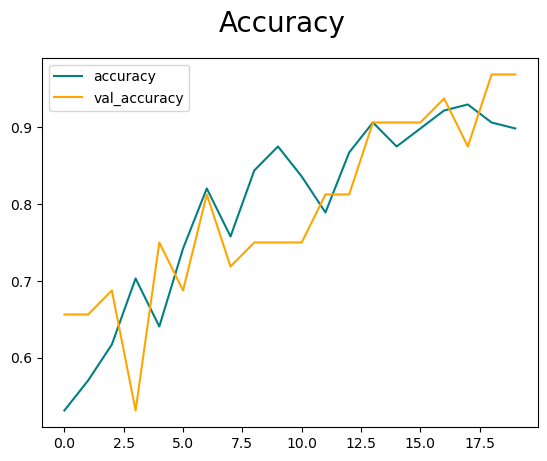

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9.Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


10.Test

In [55]:
import cv2

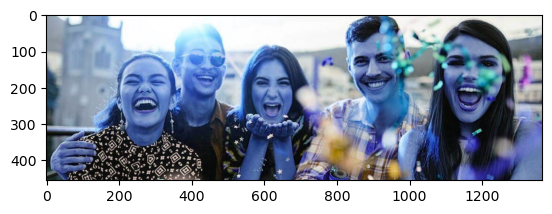

In [66]:
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

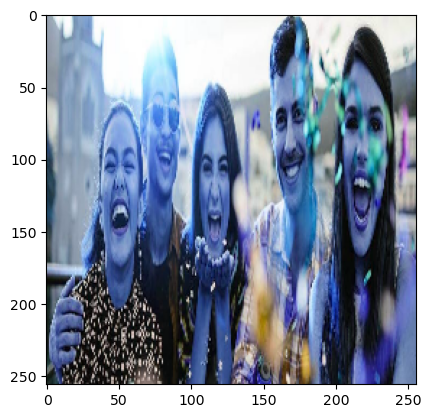

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


In [69]:
yhat

array([[0.02378618]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


11.Save the Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save(os.path.join('models','imageclassifier.h5'))

In [76]:
model.save(os.path.join('models','happysad.h5'))

In [77]:
new_model=load_model(os.path.join('models','happysad.h5'))

In [78]:
new_model

<Sequential name=sequential, built=True>